###Problem description and scenario

In this project we are going to use heart.csv dataset which consists of 14 features in total, where the first 13 features are various categories of information about patients and the 14-th column represent the label which shows if the patient is in risk of heart disease or not. The main goal of this scenario is to create model that can be used by medical workers for deciding if a person is not at risk of heart disease or there might be a need for further medical examinations.

###Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from google.colab import files


In [2]:
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Content table for columns



Acronyms and values


---


1.   **sex** - values [0 - female, 1 - male]
2.   **cp** - chest pain, values [0, 1, 2, 3]
3.   **trestbps** - resting blood presure, values [min : 94, max:  200]
4.   **chol** - serum cholestoral in mg/dl,  values [min: 126, max: 564]
5.   **fbs** - fasting blood sugar > 120 mg/dl, values [0, 1]
6.   **restecg** - resting electrocardiographic results, values [0,1,2]
7.   **thalach** - maximum heart rate achieved, values [min : 71, max:  202]
8.   **exang** - exercise induced angina, values [0, 1]
9.   **oldpeak** - ST depression induced by exercise relative to rest, values [0, 6.2]
10.   **slope** - the slope of the peak exercise ST segment, values [0, 1, 2]
11.  **ca** - number of major vessels colored by flourosopy , values [0, 1, 2, 3]
12.  **thal** - values [0 - normal, 1 - fixed defect, 2 - reversable defect]
13.  **target** - values [0 - smaller chance of heart attack, 1 - bigger chance of heart attack]









---



### Cleaning

The dataset is relatively clean, but we are going to check if there are any null values or values that are not in specified range.

In [4]:
#Data types
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
#description data (mean, std, min)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#check for null
df.isnull().sum(axis = 0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#check for missing values
df.isna().sum(axis = 0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#range of values
for name in df.columns:
  print(df[name].value_counts())
  print("")

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

1    207
0     96
Name: sex, dtype: int64

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trestbp

In [ ]:
print("Ca should value range of: 0-3")
print(df['ca'].value_counts())
#removal of wrong values
df = df[df.ca != 4]
print("\nAfter removal")
df['ca'].value_counts()

Ca should value range of: 0-3
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

After removal


0    175
1     65
2     38
3     20
Name: ca, dtype: int64

#Exploratory data analysis

##Gender

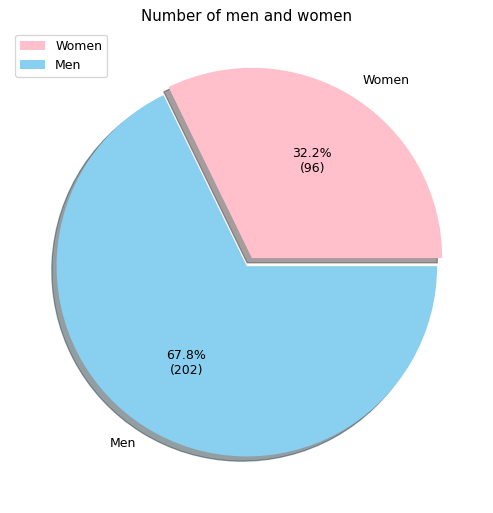

In [ ]:
men = (df['sex'] == 1).value_counts()[True]
women = (df['sex'] == 0).value_counts()[True]
data = [women,men]
#workaround 
place = 0
#function to output value and percentage in pie chart
def func(pct, data):
    global place
    absolute = data[place]
    place = place + 1
    return "{:.1f}%\n({})".format(pct, absolute)
  
plt.figure(figsize=(10, 7), dpi = 90)
plt.title("Number of men and women")
plt.pie(data, labels=['Women','Men'], autopct=lambda pct: func(pct, data), colors=['pink','#89cff0'], explode = [0.05,0], shadow = True)
plt.legend()
plt.show()

Men make 67.8% of all records in the dataset. Since the number of samples is relatively small we cannot make a conclusion that this distribution represents population accurately.

## Age

       Average number of years
Women                       54
Men                         51


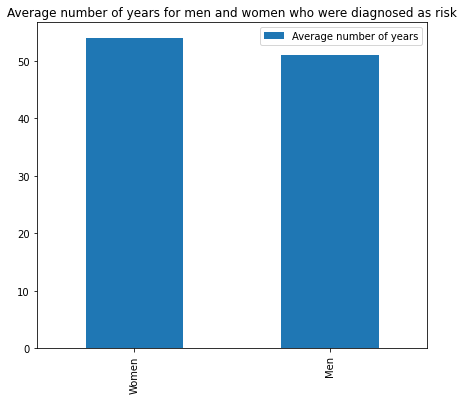

In [ ]:
womenTargetAge = df.loc[(df['sex'] == 0) & (df['target'] == 1), 'age']
menTargetAge = df.loc[(df['sex'] == 1 ) & (df['target'] == 1), 'age']
avgWomenTargetAge = int(womenTargetAge.mean())
avgMenTargetAge = int(menTargetAge.mean())
awmta = pd.DataFrame([avgWomenTargetAge,avgMenTargetAge])
awmta.index = ['Women','Men']
awmta.columns = ['Average number of years']

print(awmta)
awmta.plot.bar(figsize = (7,6))
plt.title("Average number of years for men and women who were diagnosed as risk")
plt.legend()
plt.show()



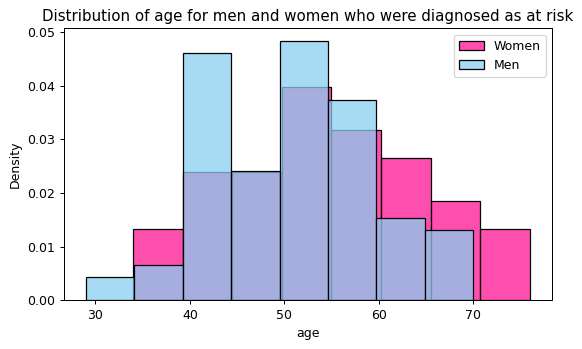

In [ ]:
plt.figure(figsize=(7,4), dpi = 90)
plt.title("Distribution of age for men and women who were diagnosed as at risk")
sns.histplot(womenTargetAge, color = "deeppink", label = "Women", stat = 'density')
sns.histplot(menTargetAge, color = "#89cff0", label = "Men", stat ='density')
plt.legend()
plt.show()

As we can see the distribution of age between men and women is very similar and it can lead to a false assumption that as you get older your chances of heart disease become smaller, which contradicts with common sense. So again we challenge how well this data represents the whole population.

## Chest pain

In [ ]:
cp = df[['cp','target']].copy()
cp0 = (df.loc[((df['cp'] == 0) & (df['target'] == 1)), 'target']).count()
cp1 = (df.loc[((df['cp'] == 1) & (df['target'] == 1)), 'target']).count()
cp2 = (df.loc[((df['cp'] == 2) & (df['target'] == 1)), 'target']).count()
cp3 = (df.loc[((df['cp'] == 3) & (df['target'] == 1)), 'target']).count()
cpTarget = pd.DataFrame(data = [cp0, cp1, cp2, cp3], index = ['CP0', 'CP1', 'CP2', 'CP3'], columns =['Number of patients'])
print("Values of chest pain for for patients who were diagnosed as at risk")
cpTarget

Values of chest pain for for patients who were diagnosed as at risk


,Number of patients
CP0,39
CP1,40
CP2,66
CP3,16


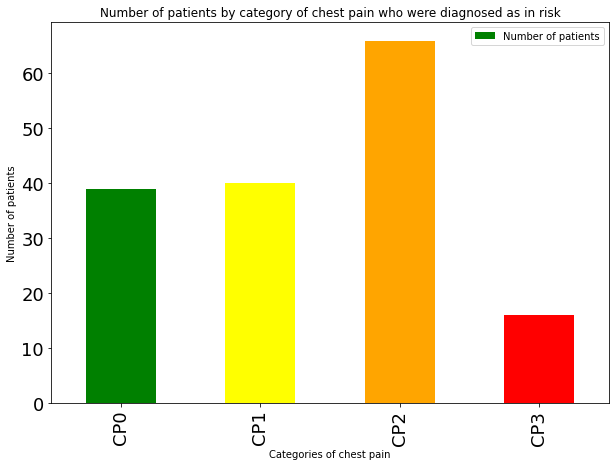

In [ ]:
cpTarget.plot.bar(figsize = (10,7) ,y='Number of patients', color = ['green','yellow','orange', 'red'], title="Number of patients by category of chest pain who were diagnosed as in risk", ylabel = 'Number of patients', xlabel ='Categories of chest pain', fontsize= 18)
plt.show()

The majority of patients who were diagnosed as at risk had the chest pain of category 2. The interesting thing is that there is almost no difference in between categories of where chest pain was 0 and 1, which corresponds to light chest pain. The last category represents extreme cases where chest pain was severe.

##Tresbps , Chol, Thalach, Oldpeak

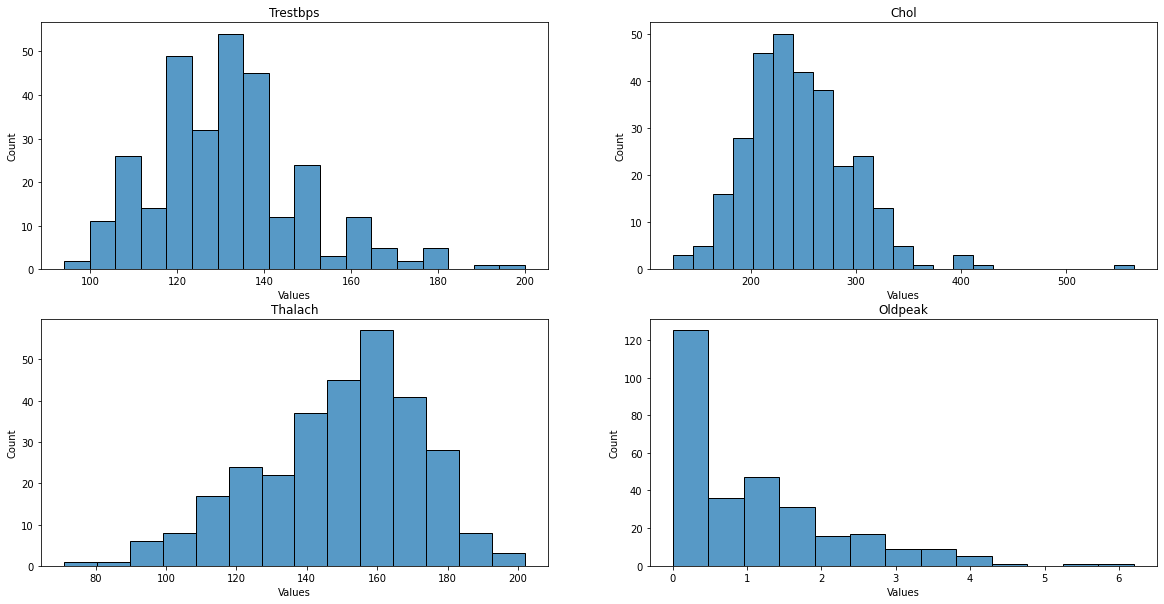

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(df['trestbps'],ax = axes[0,0])
axes[0, 0].set_title("Trestbps")
axes[0, 0].set_xlabel("Values")
axes[0, 0].set_ylabel("Count")

sns.histplot(df['chol'],ax = axes[0,1])
axes[0, 1].set_title("Chol")
axes[0, 1].set_xlabel("Values")
axes[0, 1].set_ylabel("Count")

sns.histplot(df['thalach'],ax = axes[1,0])
axes[1, 0].set_title("Thalach")
axes[1, 0].set_xlabel("Values")
axes[1, 0].set_ylabel("Count")

sns.histplot(df['oldpeak'],ax = axes[1,1])
axes[1, 1].set_title("Oldpeak")
axes[1, 1].set_xlabel("Values")
axes[1, 1].set_ylabel("Count")
plt.show()

The distribution of values for four categories which have continuous values.

##Pairplot

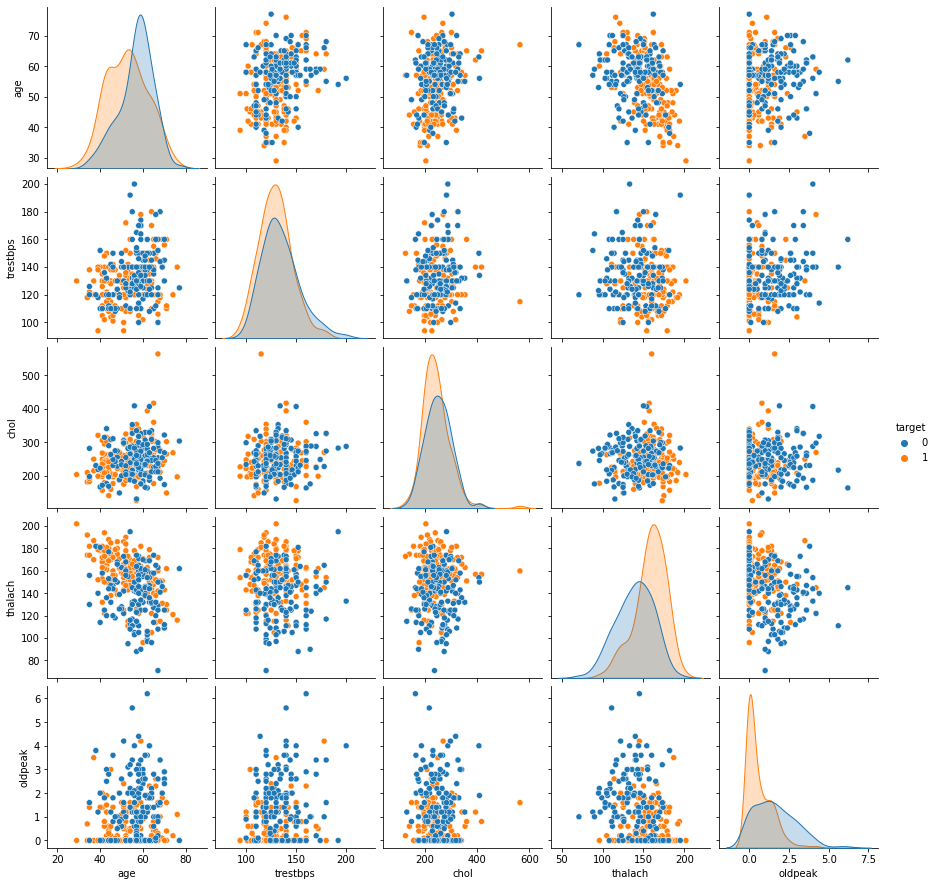

In [ ]:
continiousData =  df.iloc[:,[0,3,4,7,9,13]]
sns.pairplot(continiousData, hue = 'target')
plt.show()

High values of "thalach" and "chol" are a good indicator that something is wrong with your heart, while the "oldpeak" category shows that if the values are closer to 0 the risk of a heart disease rises. Also we can see the cluster of positive labels for age in range from 55 to 60 and for "thalach" where values are between 150 and 200.

#Normalization and split

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis = 1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Model training and evaluation

In this part of the project we'll test few models, tune the hyperparameters, and then decide the best performing model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,confusion_matrix, precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.feature_selection import SelectKBest,mutual_info_classif

##KNN

In [ ]:
knn = KNeighborsClassifier()

Since our dataset is realively small we are going to use leave one out cross validation.

In [ ]:
loocv = LeaveOneOut()
params = [{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51], 'metric': ['euclidean', 'manhattan', 'chebyshev']}]
grid_knn = GridSearchCV(knn, params, cv= loocv, n_jobs= -1)
grid_knn.fit(X_train,y_train)

print('Best parameters: ', grid_knn.best_params_)

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 49}


We can see that grid search provided manhattan distance for optimal metric and number of neighbors as 49.

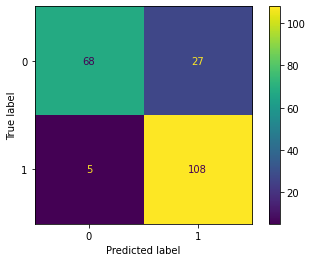

In [ ]:
plot_confusion_matrix(grid_knn, X_train, y_train, values_format='')
plt.show()

KNN gave 95% recall score on training. With 5 false negatives and 27 false positives, even though our precision is at 80% we can declare this as good result. Since we are dealing with medical data every false negative has a much greater impact, so our main goal is to minimise number of false negatives.

###Attribute selection

We are going to see if we can reduce the number of attributes and the impact that it has on recall. Since it would be computationally heavy to use loocv here we'll use 10 as our value for number of folds

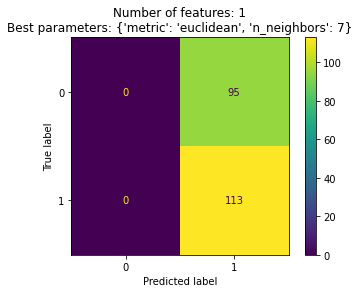

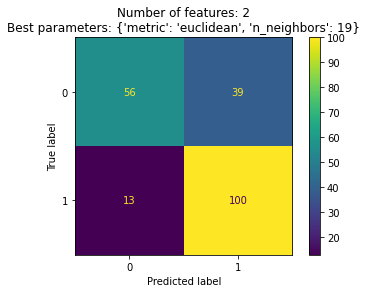

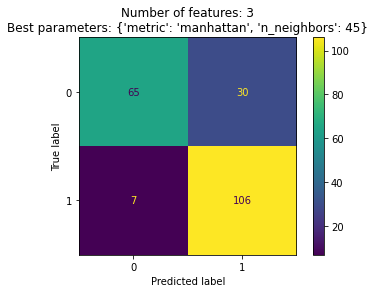

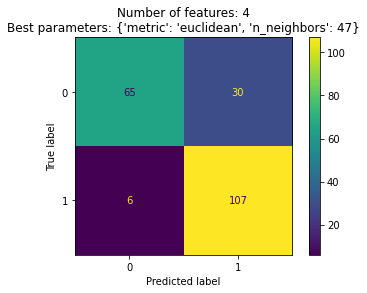

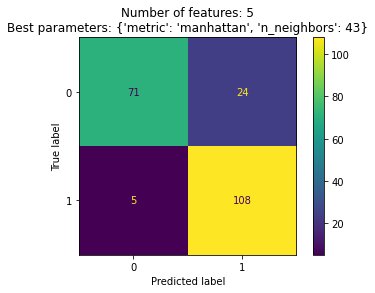

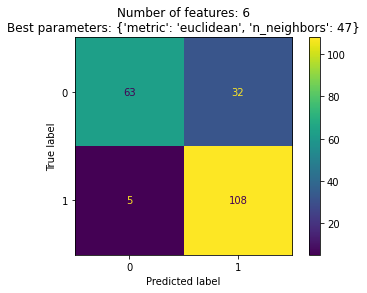

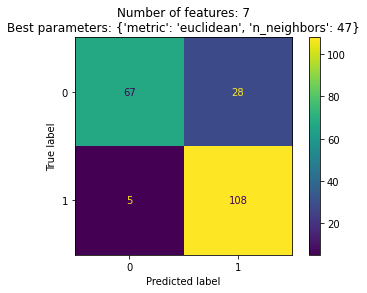

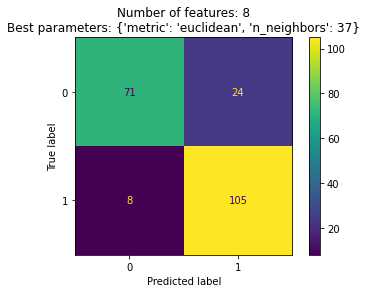

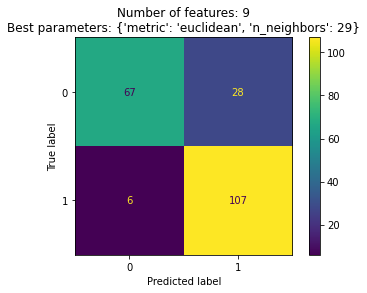

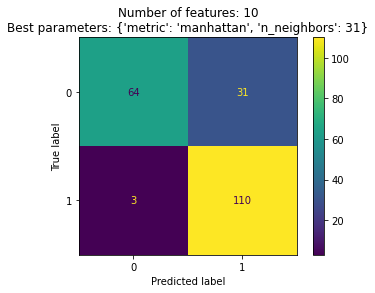

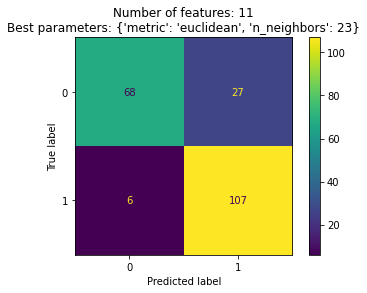

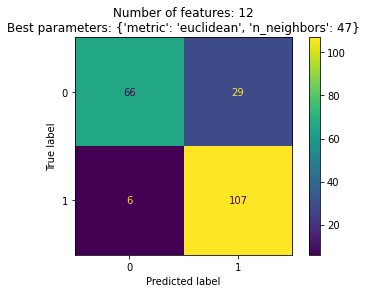

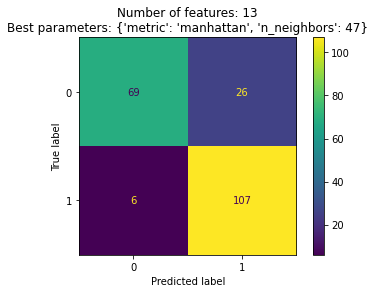

In [ ]:
scores = []

for i in range(1, 14):
  best = SelectKBest(k=i, score_func=mutual_info_classif)
  best.fit(X_train,y_train)
  X_reduced_train = pd.DataFrame(best.transform(X_train), columns=X_train[0,best.get_support()])
  X_reduced_test = pd.DataFrame(best.transform(X_test), columns=X_test[0,best.get_support()])

  params = [{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51], 'metric': ['euclidean', 'manhattan', 'chebyshev']}]
  grid_red_knn = GridSearchCV(knn, params, cv = 10, scoring='recall')
  grid_red_knn.fit(X_reduced_train,y_train)
  
  plot_confusion_matrix(grid_red_knn, X_reduced_train, y_train, values_format='')
  title = "Number of features: " + str(i) + "\n" + 'Best parameters: ' + str(grid_red_knn.best_params_)
  plt.title(title)
  plt.show()

  scores.append(grid_red_knn.score(X_reduced_train, y_train))

Judging by the number of features the best performing model on training in terms of recall would be the one with 6 features, euclidean distance as metric and the number of neighboors as 21.

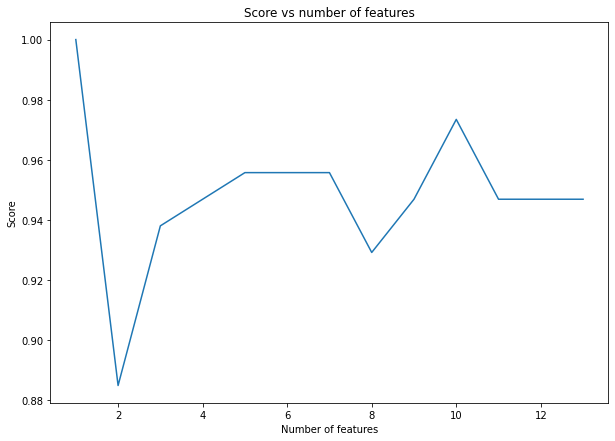

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.figure(figsize = (10,7))
plt.plot(x, scores)
plt.xlabel('Number of features')
plt.ylabel('Score')
plt.title("Score vs number of features")
plt.show()

###Testing

Now we are going to see how the best, six feature model, and the one which was trained on whole feature space behave on the test set.

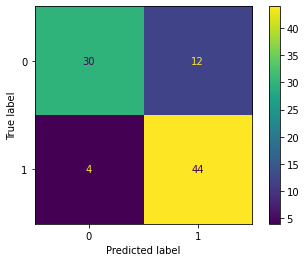

In [ ]:
grid_knn.predict(X_test)
plot_confusion_matrix(grid_knn, X_test, y_test, values_format='')
plt.show()

As we can see the model that was trained on the whole set has 0.91 recall score and 0.78 precission score.

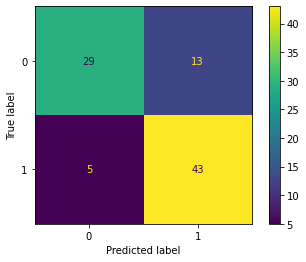

In [ ]:
best = SelectKBest(k=6, score_func=mutual_info_classif)
best.fit(X_train,y_train)
X_reduced_train = pd.DataFrame(best.transform(X_train), columns=X_train[0,best.get_support()])
X_reduced_test = pd.DataFrame(best.transform(X_test), columns=X_test[0,best.get_support()])

knn_six_features = KNeighborsClassifier(21, metric = 'euclidean')
knn_six_features.fit(X_reduced_train, y_train)

knn_six_features.predict(X_reduced_test)

plot_confusion_matrix(knn_six_features, X_reduced_test, y_test, values_format='')
plt.show()

The six-feature model had worse performance than the one that was trained on the whole set. It's performance dropped from 0.96 recall score to 0.89 and precission went from 0.80 to 0.76 in comparisson to the scores it had in validation.



---

Overall the model that was trained on the whole set showed much smaller performance drop in comparisson to six-feature one, which leads us to conclusion that leave one out cross validation which was applied to the first model gave much more precise prediction about final score of the model in comparison to 10-fold validation which was to be expected.

##SVM




In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
params = [{'C': [0.01, 0.015, 0.1, 1, 10, 100, 1000], 'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 10, 20, 30], 'kernel': ['rbf', 'linear','poly','sigmoid']}]
grid_svm = GridSearchCV(svc, params, cv = 10, n_jobs= -1)
grid_svm.fit(X_train,y_train)

print('Best parameters: ', grid_svm.best_params_)

Best parameters:  {'C': 0.01, 'gamma': 0.5, 'kernel': 'linear'}


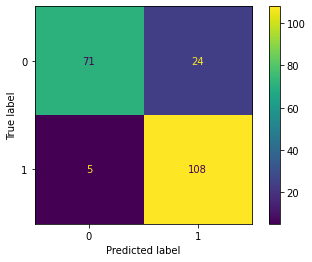

In [ ]:
plot_confusion_matrix(grid_svm, X_train, y_train, values_format='')
plt.show()

For SVM best parameters are shown above, the recall is 0.95 and precision is 0.81, overall better result than KNN without exclusion of features, during validation.


###Attribute selection


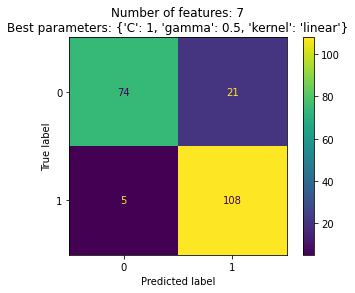

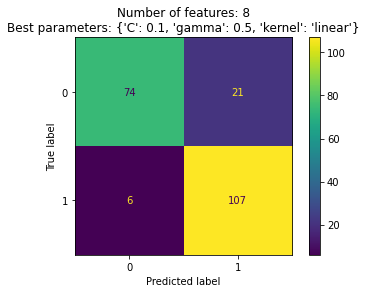

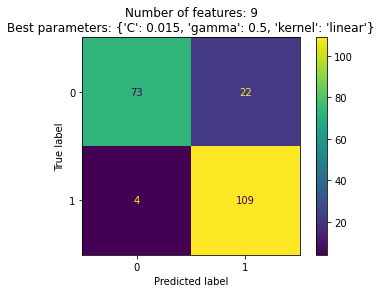

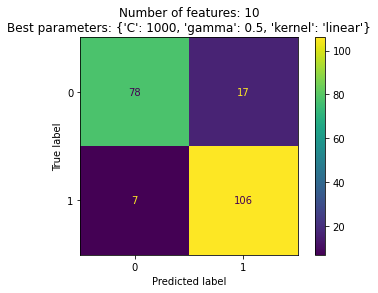

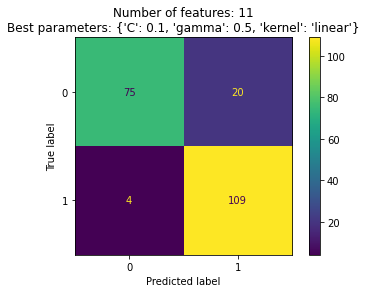

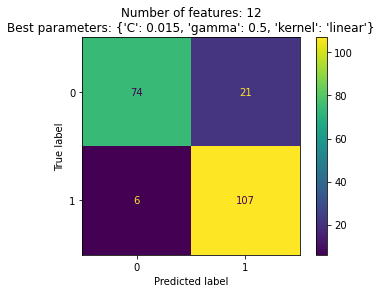

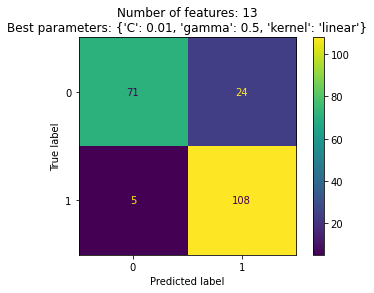

In [ ]:
scores_svm = []

for i in range(7, 14):
  best = SelectKBest(k=i, score_func=mutual_info_classif)
  best.fit(X_train,y_train)
  X_reduced_train = pd.DataFrame(best.transform(X_train), columns=X_train[0,best.get_support()])
  X_reduced_test = pd.DataFrame(best.transform(X_test), columns=X_test[0,best.get_support()])

  params = [{'C': [0.01, 0.015, 0.1, 1, 10, 100, 1000], 'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 10, 20, 30], 'kernel': ['rbf', 'linear','poly','sigmoid']}]

  grid_red_svm = GridSearchCV(svc, params, cv = 5)
  grid_red_svm.fit(X_reduced_train,y_train)


  plot_confusion_matrix(grid_red_svm, X_reduced_train, y_train, values_format='')
  title = "Number of features: " + str(i) + "\n" + 'Best parameters: ' + str(grid_red_svm.best_params_)
  plt.title(title)
  plt.show()
  scores_svm.append(grid_red_svm.score(X_reduced_train, y_train))

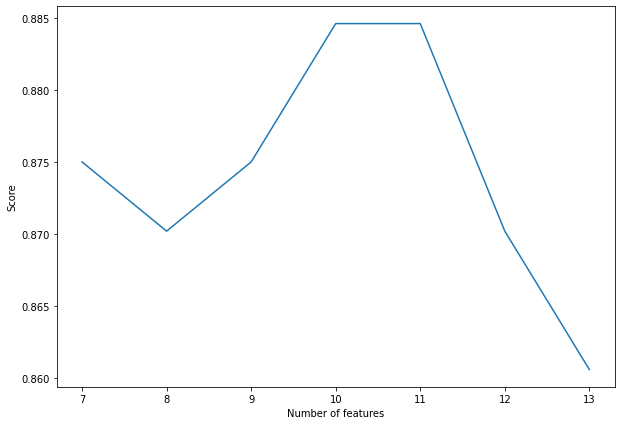

In [ ]:
x = [7,8,9,10,11,12,13]
plt.figure(figsize = (10,7))
plt.plot(x, scores_svm)
plt.xlabel('Number of features')
plt.ylabel('Score')
plt.show()

Even though we couldn't do the validation for every number of features in feature space due to computational limitations, SVM showed better results than KNN in validation. So far the SVM is best with values of: C = 0.015, gamma = 0.5, number of features = 9 and linear kernel.

###Testing

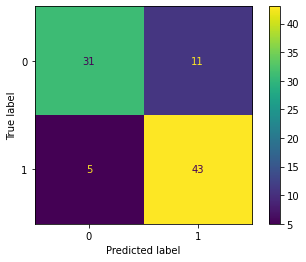

In [ ]:
grid_svm.predict(X_test)
plot_confusion_matrix(grid_svm, X_test, y_test, values_format='')
plt.show()

In comparisson to KNN this model showed much greater drop in performance. From 0.95 recall to 0.89 and from 0.81 precission to 0.79. Which might suggest that model needed better hyperparameter optimization

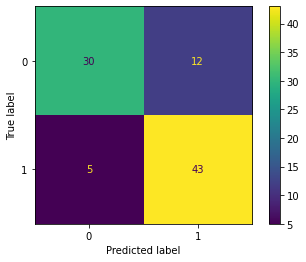

In [ ]:
  best = SelectKBest(k=9, score_func=mutual_info_classif)
  best.fit(X_train,y_train)
  X_reduced_train = pd.DataFrame(best.transform(X_train), columns=X_train[0,best.get_support()])
  X_reduced_test = pd.DataFrame(best.transform(X_test), columns=X_test[0,best.get_support()])
  svm_nine_features = SVC(0.015, kernel = 'linear', gamma = 0.5)
  svm_nine_features.fit(X_reduced_train, y_train)
  svm_nine_features.predict(X_reduced_test)

  plot_confusion_matrix(svm_nine_features, X_reduced_test, y_test, values_format='')
  plt.show()  


Decrease of performance from validation to testing: 0.96 to 0.89 recall and 0.81 to 0.78 in precission.

##Random forest

For random forest we are going to dry different approach, we will use both randomized and grid search for hyperparameter optimization.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [ ]:
rf = RandomForestClassifier()

###Randomized search

In [ ]:
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

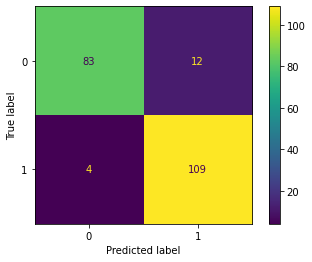

In [ ]:
plot_confusion_matrix(rf_random, X_train, y_train, values_format='')
plt.show()

During validation Random forest scored 0.96 in recall and 0.90 in precision. Recall is near values of KNN and SVM during validation but precision is much higher.

###Grid search

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 10, 20, 80, 90, 100, 110],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf_g = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf_g, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print('Best parameters: ', grid_search.best_params_)

Best parameters:  {'bootstrap': True, 'max_depth': 110, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}


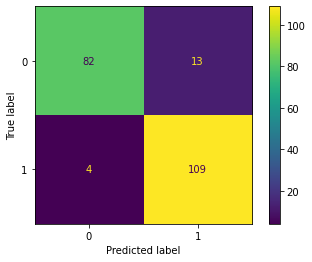

In [ ]:
plot_confusion_matrix(grid_search, X_train, y_train, values_format='')
plt.show()

Random forest using grid search scored 0.96 for recall and 0.89 for precision on validation.

###Testing

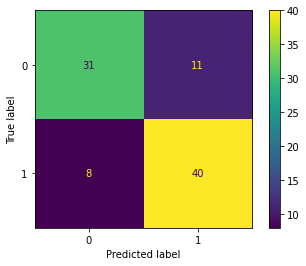

In [ ]:
rf_random.predict(X_test)
plot_confusion_matrix(rf_random, X_test, y_test, values_format='')
plt.show()

For testing, Random Forest where parameters where tuned using randomized search scored 0.83 for recall and 0.78 for precision. Which is a big drop form 0.96 and 0.89 scores for recall and precision which suggest that our model overfitted.

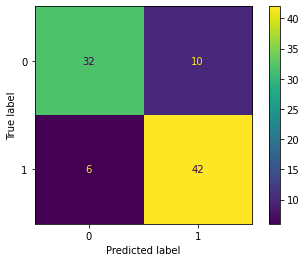

In [ ]:
grid_search.predict(X_test)
plot_confusion_matrix(grid_search, X_test, y_test, values_format='')
plt.show()

For testing, Random Forest where parameters where tuned using grid search scored 0.87 for recall and 0.80 for precison.

###Visualization of a tree

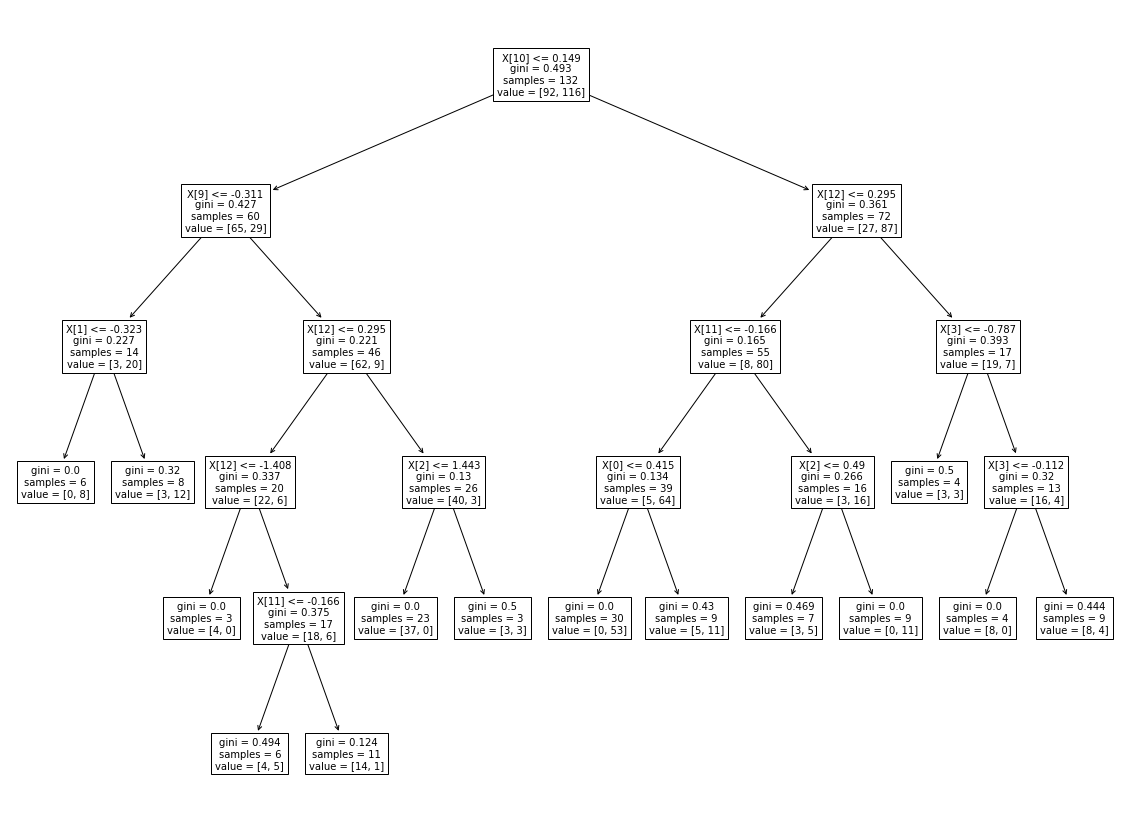

In [ ]:
best_grid_rf = grid_search.best_estimator_
estimator = best_grid_rf.estimators_[0]
plt.figure(figsize=(20,15))
tree.plot_tree(estimator, fontsize=10)
plt.show()

#Conclusion

Overall the best result was provided by a fairly simple method, KNN. While the final results of Random forest and SVM are not terrible they are in slight overfit especially Random forest which had a drop of about 10 for recall which is very important to us. Because SVM and Random forest are powerful algorithms more attention should go towards techniques that would regularize their overfit.